In [2]:
import os

import pandas as pd
import seaborn as sns

from experiments import medical_cluster_reduction as md

In [21]:
dir_path = "resultados/resultados_26_03"
files = [os.path.join(dir_path, f) 
         for f in os.listdir(dir_path) if f.endswith('.json')]
stats = md.Statistics.from_files(*files)

In [22]:
data = stats.dataframe(); data

['original_size', 'reduced_size', 'cls', 'cpd', 'error', 'time', 'net', 'var', 'improvement']


,original_size,reduced_size,cls,cpd,error,time,net,var,improvement
0,1453,1453,Cluster,CPD in ANAPHYLAXIS conditional on [],0.01,0.000178,0,0,0.0
1,1499,1499,ValueGrains,CPD in ANAPHYLAXIS conditional on [],0.01,0.000178,0,0,0.0
2,1174,1174,IndexPairs,CPD in ANAPHYLAXIS conditional on [],0.01,0.000178,0,0,0.0
3,1043,1043,IndexMap,CPD in ANAPHYLAXIS conditional on [],0.01,0.000178,0,0,0.0
4,1453,1453,Cluster,CPD in ANAPHYLAXIS conditional on [],0.05,0.000134,0,0,0.0
...,...,...,...,...,...,...,...,...,...
155995,4207,4207,IndexMap,CPD in R_LNLT1_LP_APB_MUDENS conditional on ['...,0.50,0.000793,0,0,0.0
155996,3897,3897,Cluster,CPD in R_LNLT1_LP_APB_MUDENS conditional on ['...,1.00,0.000794,0,0,0.0
155997,5919,5919,ValueGrains,CPD in R_LNLT1_LP_APB_MUDENS conditional on ['...,1.00,0.000794,0,0,0.0
155998,3538,3538,IndexPairs,CPD in R_LNLT1_LP_APB_MUDENS conditional on ['...,1.00,0.000794,0,0,0.0


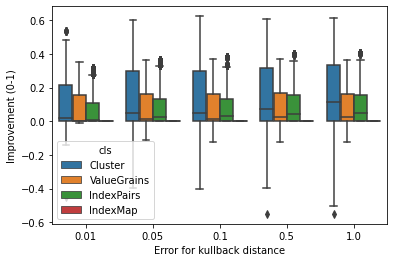

In [55]:
boxplot = sns.boxplot(x="error", y="improvement", hue="cls", data=data)
boxplot = boxplot.set(xlabel="Error for kullback distance", ylabel="Improvement (0-1)")

In [53]:
aux = data[data.cls == 'Cluster'] # time is the same for every class, thus we avoid repetitions

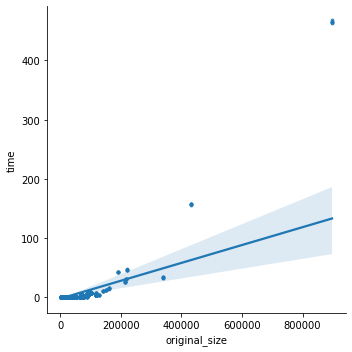

In [52]:
lmplot = sns.lmplot(x="original_size", y="time", data=aux, scatter_kws={"s": 8})

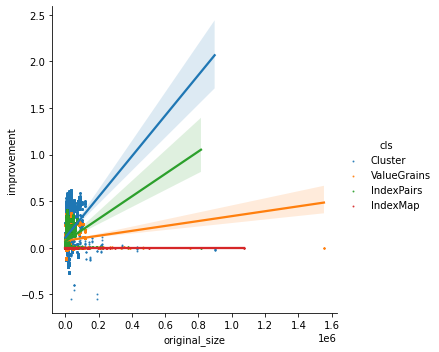

In [56]:
lmplot = sns.lmplot(x="original_size", y="improvement", hue='cls', 
                    data=data, scatter_kws={"s": 1})

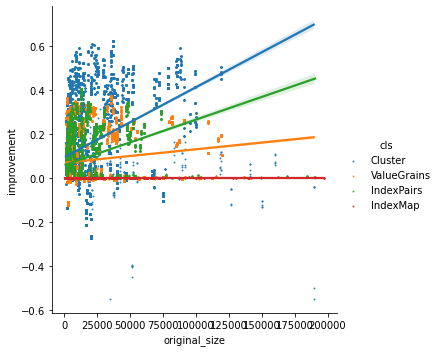

In [50]:
outlierless_size_data = data[data.original_size < 0.2*10**6]
lmplot = sns.lmplot(x="original_size", y="improvement", hue='cls', 
                    data=outlierless_size_data, scatter_kws={"s": 1})